In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import glob
import os
afile = "networkSim4"
# Load only CSVs containing 'networkSim1' in their name
csv_files = glob.glob(f"*{afile}*.csv")
for files in csv_files:
    print(files)
# Extract label from filename for each file
def extract_label(filename):
    base = os.path.basename(filename)
    label = base.replace("_benchmark.csv", "").replace("client_", "").replace("networkSim1_", "")
    return label.replace("_", " ").upper()  # Optional: format label nicely

combined_df = pd.DataFrame()

for file in csv_files:
    label = extract_label(file)
    df = pd.read_csv(file)

    df["timestamp"] = pd.to_datetime(df["timestamp"], format="%H:%M:%S")
    start_time = df["timestamp"].iloc[0]
    df["elapsed_seconds"] = (df["timestamp"] - start_time).dt.total_seconds()
    df["elapsed_minutes"] = df["elapsed_seconds"] / 60

    df["wall_time_total_seconds"] = df["wall_time_seconds"].apply(
        lambda x: sum(float(t) * 60 ** i for i, t in enumerate(reversed(str(x).split(":"))))
    )

    df["algorithm"] = label
    combined_df = pd.concat([combined_df, df], ignore_index=True)



client_networkSim4_client_kyber1024_benchmark.csv
client_networkSim4_client_bikel5_benchmark.csv
client_networkSim4_client_bikel1_benchmark.csv
client_networkSim4_client_kyber768_benchmark.csv
client_networkSim4_client_hqc256_benchmark.csv
client_networkSim4_client_hqc128_benchmark.csv
client_networkSim4_client_hqc192_benchmark.csv
client_networkSim4_client_kyber512_benchmark.csv
client_networkSim4_client_bikel3_benchmark.csv


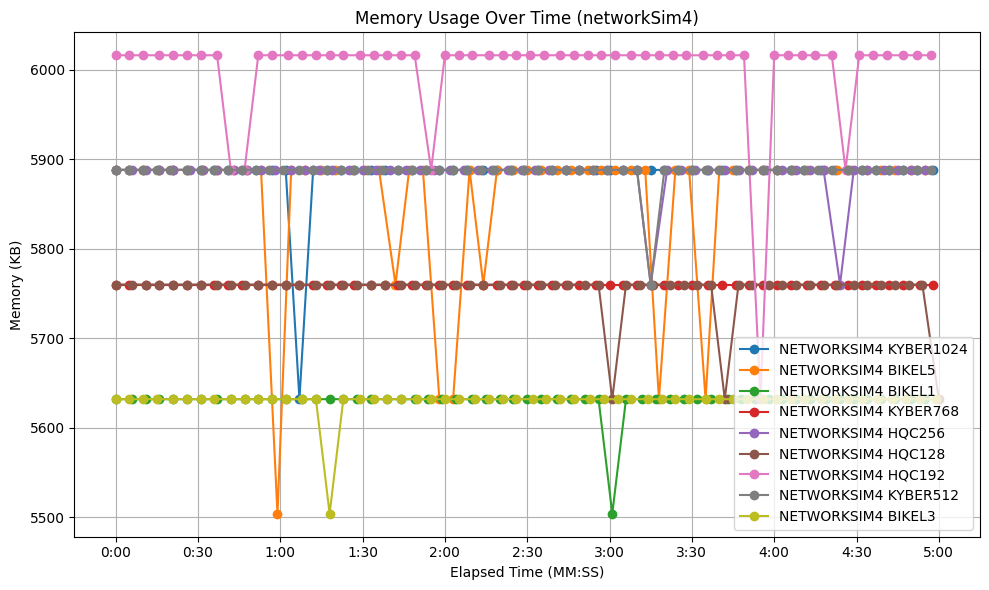

In [35]:
plt.figure(figsize=(10, 6))
for label in combined_df["algorithm"].unique():
    subset = combined_df[combined_df["algorithm"] == label]
    plt.plot(subset["elapsed_minutes"], subset["memory_kb"], marker='o', label=label)

plt.title(f"Memory Usage Over Time ({afile})")
plt.xlabel("Elapsed Time (MM:SS)")
plt.ylabel("Memory (KB)")
plt.legend()
plt.grid(True)
plt.xticks(tick_values)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_minutes_to_mmss))
plt.tight_layout()
plt.savefig(f"graphs/memory_usage_overtime_{afile}.png", dpi=300)
plt.show()


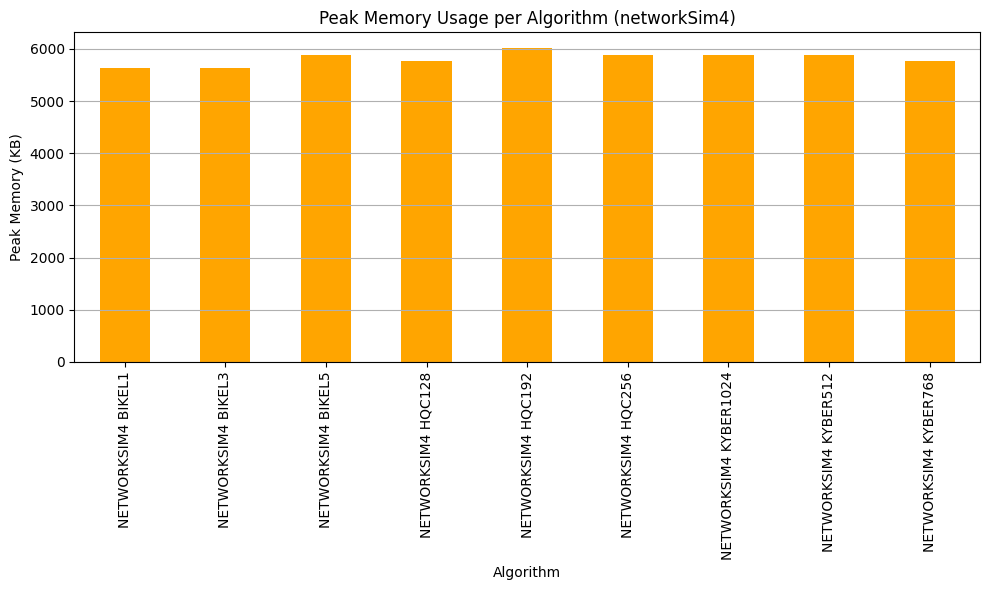

In [36]:
plt.figure(figsize=(10, 6))
peak_memory = combined_df.groupby("algorithm")["memory_kb"].max()
peak_memory.plot(kind="bar", color="orange")

plt.title(f"Peak Memory Usage per Algorithm ({afile})")
plt.xlabel("Algorithm")
plt.ylabel("Peak Memory (KB)")
plt.grid(axis="y")
plt.tight_layout()
plt.savefig(f"graphs/Peak_memory_Usage_{afile}.png", dpi=300)
plt.show()


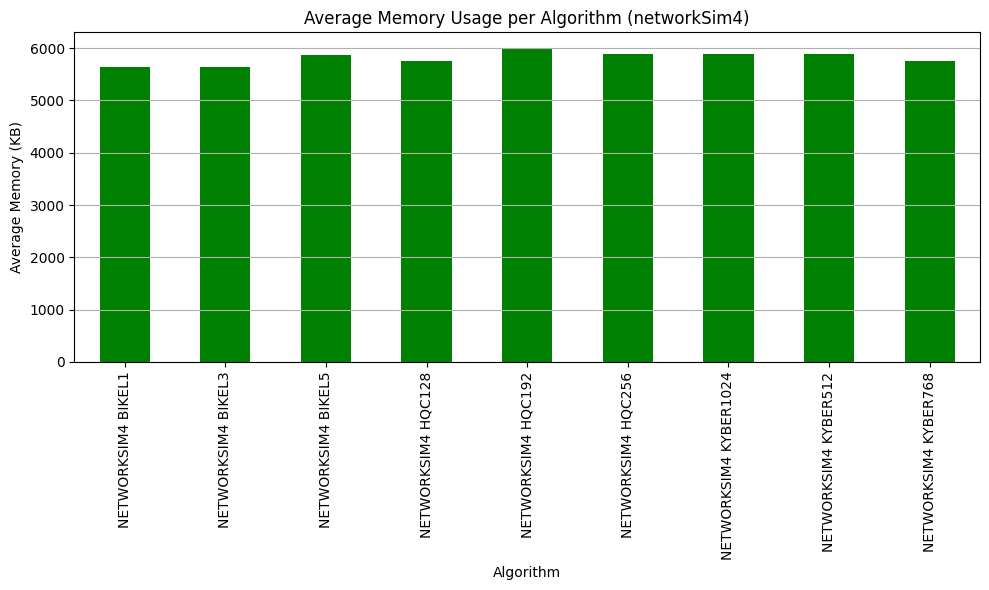

In [37]:
plt.figure(figsize=(10, 6))
avg_memory = combined_df.groupby("algorithm")["memory_kb"].mean()
avg_memory.plot(kind="bar", color="green")

plt.title(f"Average Memory Usage per Algorithm ({afile})")
plt.xlabel("Algorithm")
plt.ylabel("Average Memory (KB)")
plt.grid(axis="y")
plt.tight_layout()
plt.savefig(f"graphs/Average_Memory_Usage{afile}.png", dpi=300)
plt.show()


In [7]:
import pandas as pd
import os
import glob

def calculate_memory_stats(afile):
    csv_files = glob.glob(f"*{afile}*.csv")
    results = []

    for file in csv_files:
        df = pd.read_csv(file)
        algo_name = os.path.splitext(os.path.basename(file))[0]
        df['memory_kb'] = pd.to_numeric(df['memory_kb'], errors='coerce')

        mean = df['memory_kb'].mean()
        std = df['memory_kb'].std()

        results.append({
            'Algorithm': algo_name,
            'Mean ± Std Dev (KB)': f"{mean:.2f} ± {std:.2f}"
        })

    results_df = pd.DataFrame(results)
    results_df.sort_values('Algorithm', inplace=True)
    print(results_df.to_string(index=False))


In [10]:
calculate_memory_stats("networkSim1")


                                    Algorithm Mean ± Std Dev (KB)
   client_networkSim1_client_bikel1_benchmark      5632.00 ± 0.00
   client_networkSim1_client_bikel3_benchmark     5627.59 ± 33.61
   client_networkSim1_client_bikel5_benchmark     5851.43 ± 93.63
   client_networkSim1_client_hqc128_benchmark     5757.83 ± 16.66
   client_networkSim1_client_hqc192_benchmark     5998.34 ± 55.97
   client_networkSim1_client_hqc256_benchmark     5874.53 ± 46.43
client_networkSim1_client_kyber1024_benchmark      5888.00 ± 0.00
 client_networkSim1_client_kyber512_benchmark      5888.00 ± 0.00
 client_networkSim1_client_kyber768_benchmark      5760.00 ± 0.00


In [11]:
calculate_memory_stats("networkSim2")


                                    Algorithm Mean ± Std Dev (KB)
   client_networkSim2_client_bikel1_benchmark      5632.00 ± 0.00
   client_networkSim2_client_bikel3_benchmark     5629.79 ± 16.81
   client_networkSim2_client_bikel5_benchmark      5888.00 ± 0.00
   client_networkSim2_client_hqc128_benchmark      5760.00 ± 0.00
   client_networkSim2_client_hqc192_benchmark     5987.31 ± 68.00
   client_networkSim2_client_hqc256_benchmark     5881.26 ± 28.84
client_networkSim2_client_kyber1024_benchmark      5888.00 ± 0.00
 client_networkSim2_client_kyber512_benchmark     5885.83 ± 16.66
 client_networkSim2_client_kyber768_benchmark     5757.83 ± 16.66


In [12]:
calculate_memory_stats("networkSim3")


                                    Algorithm Mean ± Std Dev (KB)
   client_networkSim3_client_bikel1_benchmark      5632.00 ± 0.00
   client_networkSim3_client_bikel3_benchmark     5620.97 ± 43.45
   client_networkSim3_client_bikel5_benchmark     5858.29 ± 80.92
   client_networkSim3_client_hqc128_benchmark     5749.15 ± 35.95
   client_networkSim3_client_hqc192_benchmark     6000.55 ± 48.42
   client_networkSim3_client_hqc256_benchmark     5879.02 ± 32.99
client_networkSim3_client_kyber1024_benchmark      5888.00 ± 0.00
 client_networkSim3_client_kyber512_benchmark      5888.00 ± 0.00
 client_networkSim3_client_kyber768_benchmark     5757.83 ± 16.66


In [9]:
calculate_memory_stats("networkSim4")


                                    Algorithm Mean ± Std Dev (KB)
   client_networkSim4_client_bikel1_benchmark     5629.79 ± 16.81
   client_networkSim4_client_bikel3_benchmark     5629.79 ± 16.81
   client_networkSim4_client_bikel5_benchmark     5858.29 ± 84.52
   client_networkSim4_client_hqc128_benchmark     5753.49 ± 28.36
   client_networkSim4_client_hqc192_benchmark     6000.55 ± 59.11
   client_networkSim4_client_hqc256_benchmark     5883.51 ± 23.76
client_networkSim4_client_kyber1024_benchmark     5883.66 ± 33.33
 client_networkSim4_client_kyber512_benchmark     5885.83 ± 16.66
 client_networkSim4_client_kyber768_benchmark      5760.00 ± 0.00
